İlk olarak 5.1 Betimsel Ağ İstatistikleri bölümünü ele alalım. Veritabanımızda bulunan düğüm ve kenar sayılarından başlayarak, ağın temel yapısal özelliklerini inceleyeceğiz.

### 5.1 Betimsel Ağ İstatistikleri

İlk olarak, ağın temel sayısal özelliklerini anlamak için aşağıdaki Cypher sorgusunu çalıştıralım:

```cypher
// Temel ağ istatistikleri
MATCH (n)
RETURN 'Düğüm sayısı' AS İstatistik, count(n) AS Değer
UNION
MATCH ()-[r]->()
RETURN 'Kenar sayısı' AS İstatistik, count(r) AS Değer
```

Ardından, düğümleri varlık türlerine göre analiz edelim:

```cypher
// Varlık türlerine göre dağılım analizi
MATCH (n)
RETURN labels(n)[0] AS VarlıkTürü, count(n) AS Sayı
ORDER BY Sayı DESC
```

İlişki türlerine göre dağılımı incelemek için de şu sorguyu kullanalım:

```cypher
// İlişki türlerine göre dağılım analizi
MATCH ()-[r]->()
RETURN type(r) AS İlişkiTürü, count(r) AS Sayı
ORDER BY Sayı DESC
```

Ağ yoğunluğu ve ortalama derece gibi temel ağ metriklerini hesaplamak için:

```cypher
// Ağ yoğunluğu ve ortalama derece
MATCH (n)
WITH count(n) AS nodeCount
MATCH ()-[r]->()
WITH nodeCount, count(r) AS edgeCount
RETURN 
  'Ağ yoğunluğu' AS Metrik, 
  toFloat(edgeCount) / (nodeCount * (nodeCount - 1)) AS Değer
UNION
MATCH (n)
WITH count(n) AS nodeCount
MATCH ()-[r]->()
WITH nodeCount, count(r) AS edgeCount
RETURN 
  'Ortalama derece' AS Metrik, 
  toFloat(edgeCount) / nodeCount AS Değer
```

Görselleştirme için, varlık türlerinin dağılımını gösteren bir pasta grafiği yapabiliriz. Bu görselleştirmeyi Python Matplotlib kullanarak oluşturalım:

```python
import matplotlib.pyplot as plt
import pandas as pd

# Neo4j sorgu sonuçlarını varsayalım - bu değerler yerine gerçek verileri kullanacağız
entity_types = ['STAKEHOLDER', 'PROBLEM_CHALLENGE', 'SOLUTION_APPROACH', 'FOCUS_AREA_THEME']
counts = [0, 0, 0, 0]  # Bu değerler sorgu sonuçlarıyla doldurulacak

# Pasta grafiği oluştur
plt.figure(figsize=(10, 7))
plt.pie(counts, labels=entity_types, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  # Daireyi bir çember yaparak oranları koruyor
plt.title('Uzaktan Eğitim Bilgi Ağında Varlık Türlerinin Dağılımı')
plt.tight_layout()
plt.savefig('entity_distribution.png', dpi=300)
plt.show()
```

Ayrıca ilişki türlerini gösteren bir bar grafiği de yapabiliriz:

```python
import matplotlib.pyplot as plt
import pandas as pd

# Neo4j sorgu sonuçlarını varsayalım - bu değerler yerine gerçek verileri kullanacağız
relation_types = ['USES', 'FACES', 'REQUIRES', 'ADDRESSES', 'ENHANCES', 'HINDERS', 'EXAMINES']
counts = [0, 0, 0, 0, 0, 0, 0]  # Bu değerler sorgu sonuçlarıyla doldurulacak

# Bar grafiği oluştur
plt.figure(figsize=(12, 6))
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('İlişki Türleri')
plt.ylabel('Sayı')
plt.title('Uzaktan Eğitim Bilgi Ağında İlişki Türlerinin Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('relation_distribution.png', dpi=300)
plt.show()
```

Bu sorgular ve görselleştirmeler, ağımızın temel özelliklerini anlamak için bir başlangıç sağlayacaktır. İlk sorguyu çalıştırabilir miyiz? Düğüm ve kenar sayılarını öğrenelim.

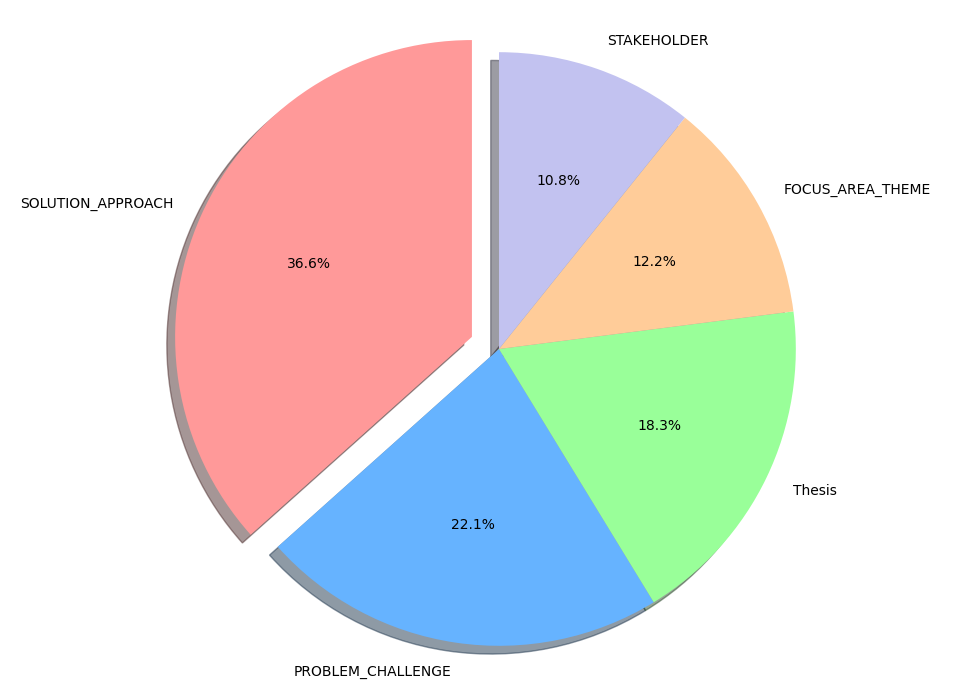

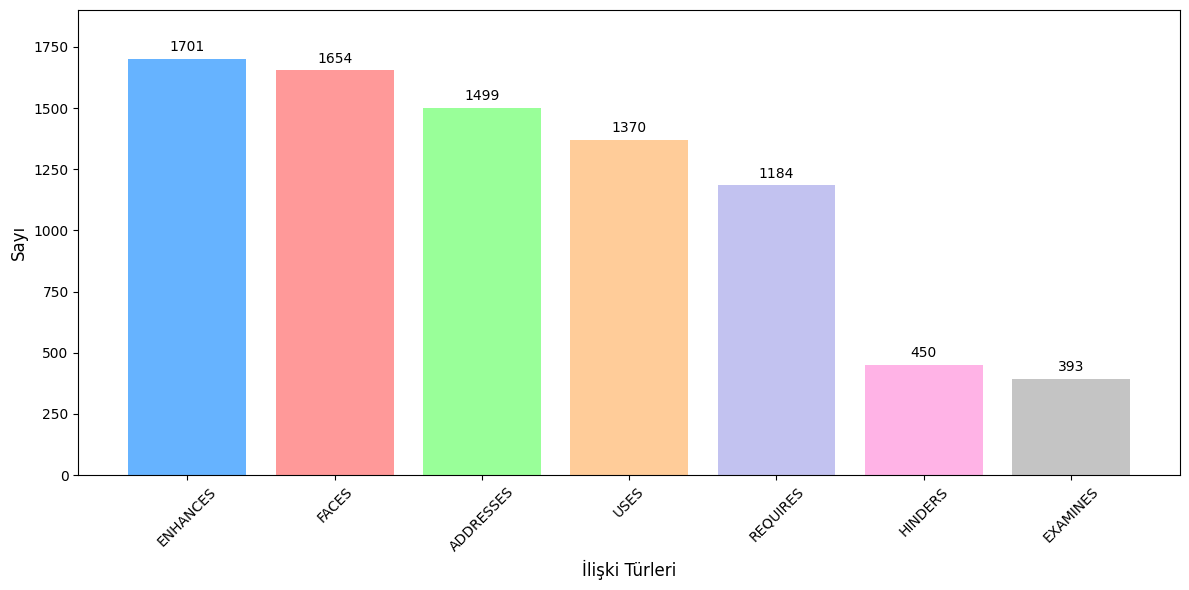

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Varlık türlerinin dağılımı için pasta grafiği
entity_types = ['SOLUTION_APPROACH', 'PROBLEM_CHALLENGE', 'Thesis', 'FOCUS_AREA_THEME', 'STAKEHOLDER']
counts = [1407, 850, 703, 469, 414]
percentages = [count/sum(counts)*100 for count in counts]

# Pasta grafiği oluştur
plt.figure(figsize=(10, 7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
explode = (0.1, 0, 0, 0, 0)  # Çözüm/Yaklaşımı öne çıkar

plt.pie(counts, labels=entity_types, autopct='%1.1f%%', startangle=90, 
        shadow=True, colors=colors, explode=explode)
plt.axis('equal')  # Daireyi bir çember yaparak oranları koruyor
# plt.title('Şekil 1: Uzaktan Eğitim Bilgi Ağında Varlık Türlerinin Dağılımı', fontsize=14)
plt.tight_layout()
plt.savefig('entity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# İlişki türlerinin dağılımı için bar grafiği (CONTAINS hariç)
relation_types = ['ENHANCES', 'FACES', 'ADDRESSES', 'USES', 'REQUIRES', 'HINDERS', 'EXAMINES']
counts = [1701, 1654, 1499, 1370, 1184, 450, 393]

# Bar grafiği oluştur
plt.figure(figsize=(12, 6))
bars = plt.bar(relation_types, counts, color=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4c4c4'])

# Değerleri çubukların üzerinde göster
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'{height}', ha='center', va='bottom', fontsize=10)

plt.xlabel('İlişki Türleri', fontsize=12)
plt.ylabel('Sayı', fontsize=12)
# plt.title('Şekil 2: Uzaktan Eğitim Bilgi Ağında İlişki Türlerinin Dağılımı', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, max(counts) + 200)  # Değerlerin üzerindeki metinlere yer aç
plt.tight_layout()
plt.savefig('relation_distribution.png', dpi=300, bbox_inches='tight')
plt.show()